## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from pathlib import Path

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500

# Calculate the value counts for APPLICATION_TYPE
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Select application types to be replaced based on the cutoff value
application_types_to_replace = list(application_type_counts[application_type_counts < cutoff_value].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_greater_than_1 = classification_counts[classification_counts > 1]
classification_counts_greater_than_1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 100
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Select classifications to be replaced based on the cutoff value
classifications_to_replace = list(classification_counts[classification_counts < cutoff_value].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
attrition_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[attrition_cat].nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION            12
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [10]:
# Use pd.get_dummies to convert categorical columns to numeric
encode_df = pd.get_dummies(application_df[attrition_cat])

# Drop the original categorical columns from application_df
application_df = application_df.drop(attrition_cat, axis=1)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
application_df = pd.concat([application_df, encode_df], axis=1)

application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Save application_df into csv for optimisasation file
file_path = 'Resources/application_data.csv'

# Export application_df to CSV
application_df.to_csv(file_path, index=False)

In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5
output_nodes_layer = 1
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_nodes_layer, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 400       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 451 (1.76 KB)
Trainable params: 451 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


804/804 [==============================] - 2s 2ms/step - loss: 0.6169 - accuracy: 0.6777
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5640 - accuracy: 0.7252
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7300
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7290
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7297
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.7300
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7302
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accu

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5528 - accuracy: 0.7254 - 537ms/epoch - 2ms/step
Loss: 0.5528295636177063, Accuracy: 0.7253644466400146


In [18]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
nn.save("AlphabetSoupCharity.h5")

C:\Users\mh30f\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# optimise model to achieve a target predictive accuracy higher than 75%.
# attemp 1 Add more neurons to a hidden layer both 1st and 2nd layer 
# Used different  activation function 
# increased the number epoches
# Create a callback that saves the model's weights every five epochs 

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  64
hidden_nodes_layer2 = 64
output_nodes_layer = 1
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_nodes_layer, activation="sigmoid"))


# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Define a ModelCheckpoint callback
checkpoint_filepath = 'AlphabetSoupCharity.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',  # Save every epoch
    period=5,  # Save every 5 epochs
    verbose=1
)


# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=120, callbacks=[model_checkpoint_callback])

Epoch 1/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5706 - accuracy: 0.7205
Epoch 2/120
804/804 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7281
Epoch 3/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7301
Epoch 4/120
804/804 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.7313
Epoch 5/120
789/804 [============================>.] - ETA: 0s - loss: 0.5483 - accuracy: 0.7304
Epoch 5: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7297
Epoch 6/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7336
Epoch 7/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7337
Epoch 8/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7341
Epoch 9/120
804/804 [==============================] - 2s 2

In [20]:
# Evaluate the model using the test data after attemp 2 optimisation
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5546 - accuracy: 0.7277 - 549ms/epoch - 2ms/step
Loss: 0.5545862913131714, Accuracy: 0.7276967763900757


In [21]:
# optimise model to achieve a target predictive accuracy higher than 75%.
# attemp 2 -Add more layers to previous ones 

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32  # Added a new hidden layer
output_nodes_layer = 1

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_nodes_layer, activation="sigmoid"))

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Define a ModelCheckpoint callback
checkpoint_filepath = 'AlphabetSoupCharity.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',  # Save every epoch
    period=5,  # Save every 5 epochs
    verbose=1
)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=120, callbacks=[model_checkpoint_callback])

Epoch 1/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5690 - accuracy: 0.7211
Epoch 2/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7312
Epoch 3/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7308
Epoch 4/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7328
Epoch 5/120
781/804 [============================>.] - ETA: 0s - loss: 0.5483 - accuracy: 0.7331
Epoch 5: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7336
Epoch 6/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7339
Epoch 7/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.7348
Epoch 8/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5455 - accuracy: 0.7334
Epoch 9/120
804/804 [==============================] - 2s 2

In [22]:
# Evaluate the model using the test data after attemp 2 optimisation
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5548 - accuracy: 0.7247 - 640ms/epoch - 2ms/step
Loss: 0.5547601580619812, Accuracy: 0.7246647477149963


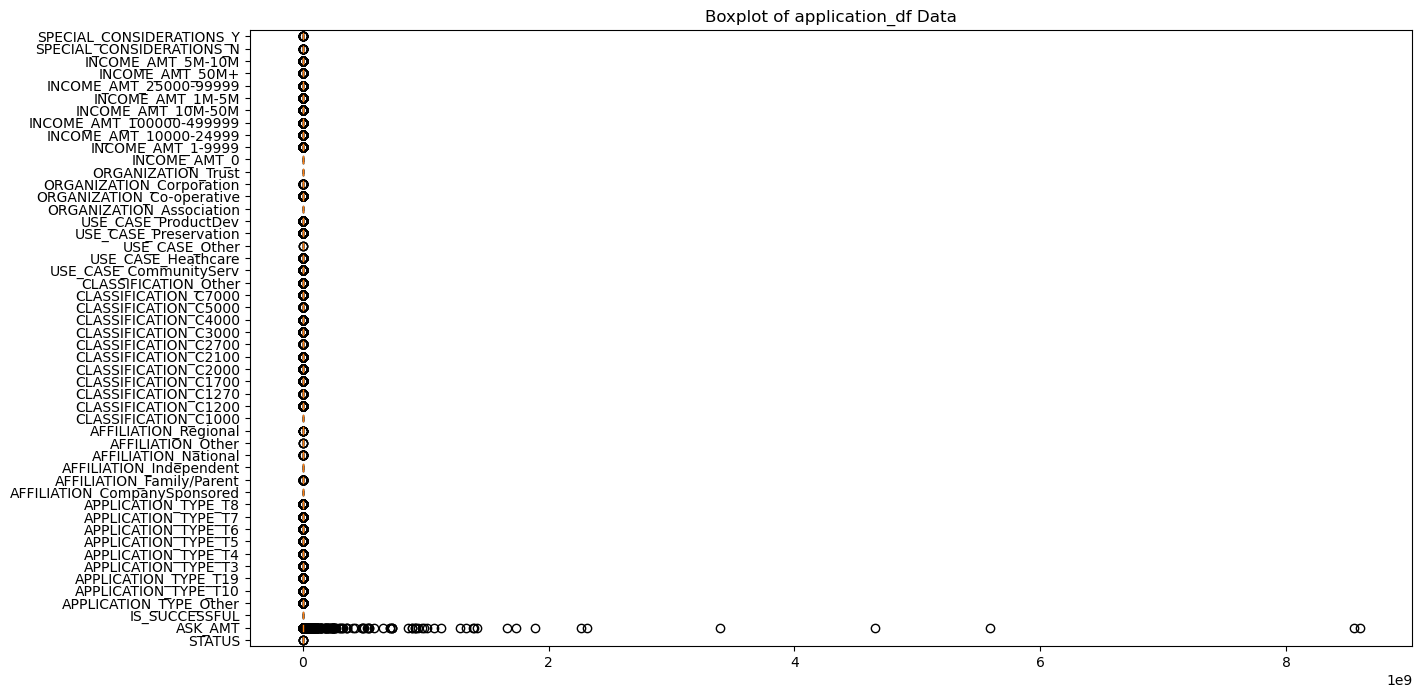

In [23]:
# optimise model to achieve a target predictive accuracy higher than 75%.
# Attemp 3-Adjust the input data- find and drop the outliers are causing confusion 

# Dependencies
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
ax.boxplot(application_df.to_numpy(), labels=application_df.columns, vert=False)
ax.set_title('Boxplot of application_df Data')
plt.show()

In [24]:
# Drop the oulier column(ASK_AMT)
application_df = application_df.drop(["ASK_AMT"], axis=1)

In [25]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# optimise model to achieve a target predictive accuracy higher than 75%.
# attemp 3 after data adjustment 

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32
output_nodes_layer = 1

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_nodes_layer, activation="sigmoid"))

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Define a ModelCheckpoint callback
checkpoint_filepath = 'AlphabetSoupCharity.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',  # Save every epoch
    period=5,  # Save every 5 epochs
    verbose=1
)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=120, callbacks=[model_checkpoint_callback])

Epoch 1/120
804/804 [==============================] - 3s 2ms/step - loss: 0.5691 - accuracy: 0.7210
Epoch 2/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7290
Epoch 3/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7320
Epoch 4/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7331
Epoch 5/120
785/804 [============================>.] - ETA: 0s - loss: 0.5475 - accuracy: 0.7326
Epoch 5: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7320
Epoch 6/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7337
Epoch 7/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7326
Epoch 8/120
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7336
Epoch 9/120
804/804 [==============================] - 2s 2

In [28]:
# Evaluate the model using the test data after attemp 2 optimisation
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5883 - accuracy: 0.6999 - 588ms/epoch - 2ms/step
Loss: 0.5883292555809021, Accuracy: 0.6999416947364807
